In [1]:
import pandas as pd
import pickle
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
class TrainDataset(Dataset):
    def __init__(self, data: pd.DataFrame):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx) -> Tuple[torch.Tensor, torch.Tensor]:
        seq = torch.tensor(self.data.iloc[idx]['sequence'], dtype=torch.float32)
        composer = torch.tensor(self.data.iloc[idx]['composer'], dtype=torch.float32)
        return seq, composer

In [4]:
from helper_functions import pad_collate

training_data = pickle.load(open('train.pkl', 'rb'))
training_data = pd.DataFrame(training_data, columns=['sequence', 'composer'])
train_val_split = 0.8
train_data, val_data = train_test_split(training_data, test_size=1-train_val_split, random_state=42)
train_dataset = TrainDataset(train_data)
val_dataset = TrainDataset(val_data)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=pad_collate)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=pad_collate)

In [5]:
from models import LSTM_var_Seq
from training_functions import train_lstm
from helper_functions import get_accuracy, get_confusion_matrix, plot_training, plot_confusion_matrix

In [10]:
model = LSTM_var_Seq(1, 128, 1, 5)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.to(device)
criterion.to(device)
loss_hist, train_acc, val_acc = train_lstm(model, train_loader, val_loader, optimizer, criterion, get_accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0, loss: 0.846


 10%|█         | 10/100 [00:25<03:47,  2.53s/it]

Epoch: 10, loss: 1.23


 20%|██        | 20/100 [00:50<03:21,  2.52s/it]

Epoch: 20, loss: 1.2


 30%|███       | 30/100 [01:15<02:56,  2.53s/it]

Epoch: 30, loss: 1.21


 40%|████      | 40/100 [01:41<02:31,  2.53s/it]

Epoch: 40, loss: 1.4


 50%|█████     | 50/100 [02:06<02:04,  2.49s/it]

Epoch: 50, loss: 1.28


 60%|██████    | 60/100 [02:31<01:41,  2.55s/it]

Epoch: 60, loss: 1.55


 70%|███████   | 70/100 [02:56<01:15,  2.52s/it]

Epoch: 70, loss: 1.08


 80%|████████  | 80/100 [03:21<00:50,  2.51s/it]

Epoch: 80, loss: 0.798


 90%|█████████ | 90/100 [03:46<00:24,  2.48s/it]

Epoch: 90, loss: 1.34


100%|██████████| 100/100 [04:11<00:00,  2.52s/it]


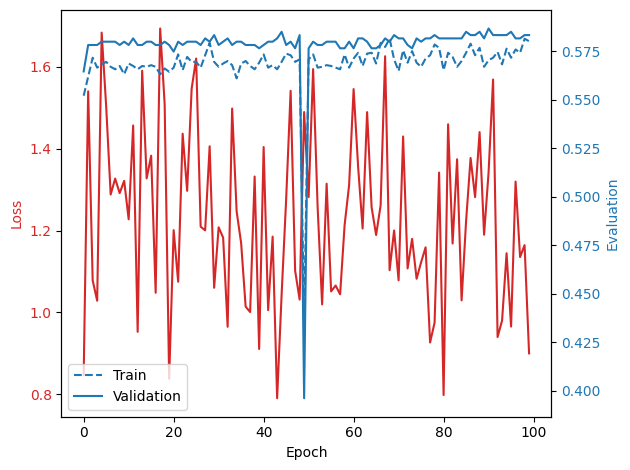

In [11]:
plot_training(loss_hist, train_acc, val_acc)

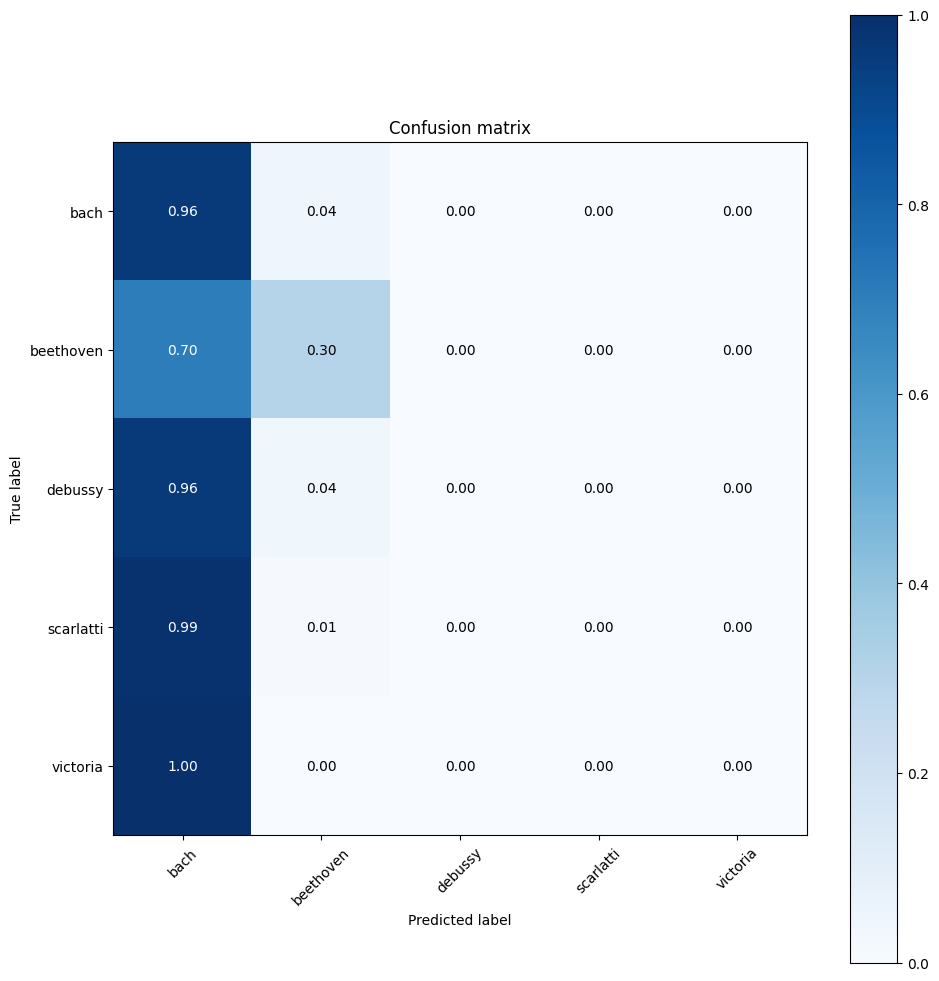

In [13]:
confusion_matrix = get_confusion_matrix(model, val_loader, 5, device)
plot_confusion_matrix(confusion_matrix, classes.values())